In [80]:
import numpy as np
import pandas as pd
from source.moreka import AxonData
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from scipy.stats import poisson
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, LSTM, RepeatVector
from keras.models import Model
import mdn
import plotly.express as px

from sim import generate, moving_average

(6000,)


/var/folders/r7/tkgkdkvx69326wjgg98cf2780000gn/T/ipykernel_102/1611339405.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='time', ylabel='signal'>

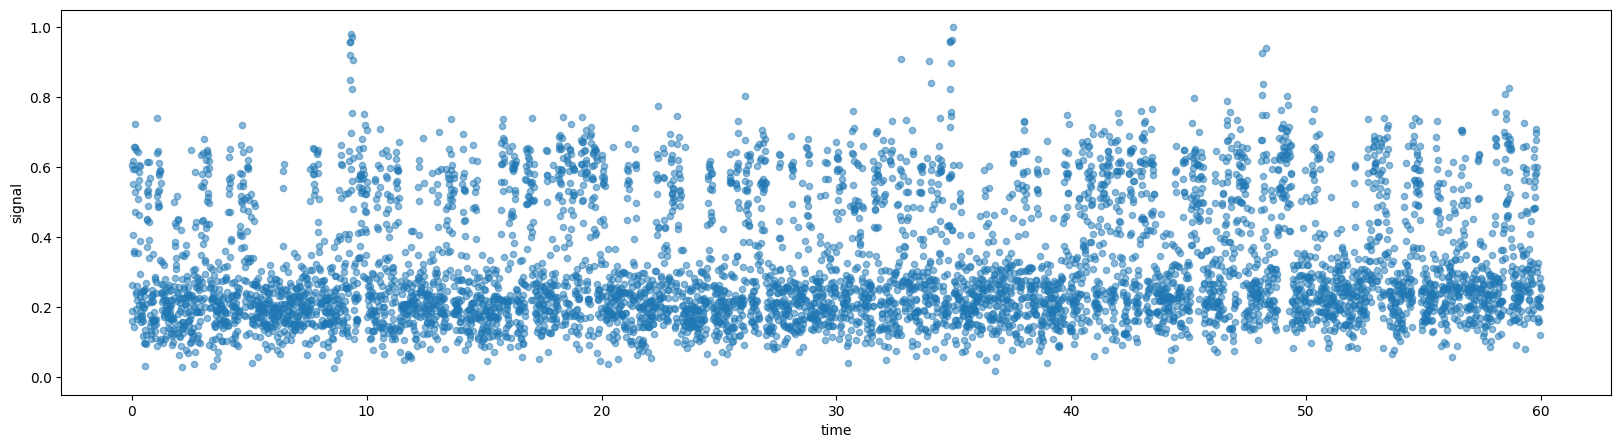

In [81]:
data = AxonData(dirname='./data')
df = data[21].iloc[::100, :]

print(df.signal.shape)
# normalize signal to [0, 1]
df.signal = (df.signal - df.signal.min()) / (df.signal.max() - df.signal.min())
df.plot(x='time', y='signal', figsize=(20, 5), kind='scatter', alpha=0.5)

/var/folders/r7/tkgkdkvx69326wjgg98cf2780000gn/T/ipykernel_102/3898011582.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='time', ylabel='ma'>

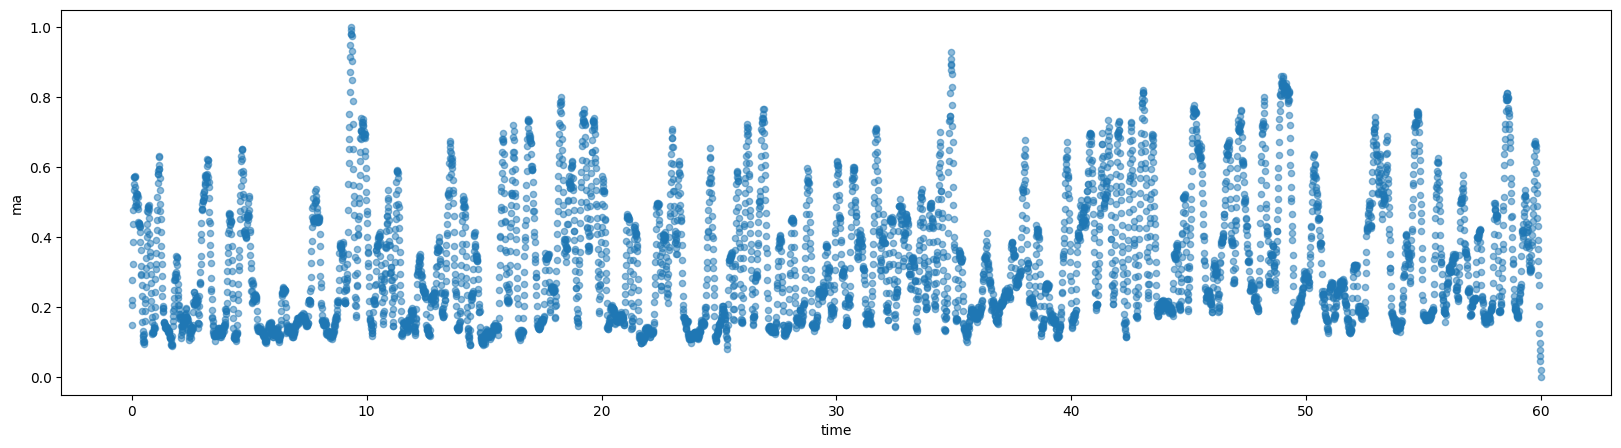

In [82]:
ma = moving_average(df.signal, 20)
# normalize moving average to [0, 1]
ma = (ma - ma.min()) / (ma.max() - ma.min())
df['ma'] = ma
df.plot(x='time', y='ma', figsize=(20, 5), kind='scatter', alpha=0.5)

In [83]:
noised_and_ma = np.concatenate((df.signal, ma), axis=0)
noised_and_ma.reshape(1, 12000)
noised_and_ma.shape

(12000,)

In [84]:
model = tf.keras.models.load_model('denoiser.keras')


In [85]:
denoised = model.predict(noised_and_ma.reshape(1, 12000, 1))

1/1 [==============================] - 0s 84ms/step


(1.0, 5.0)

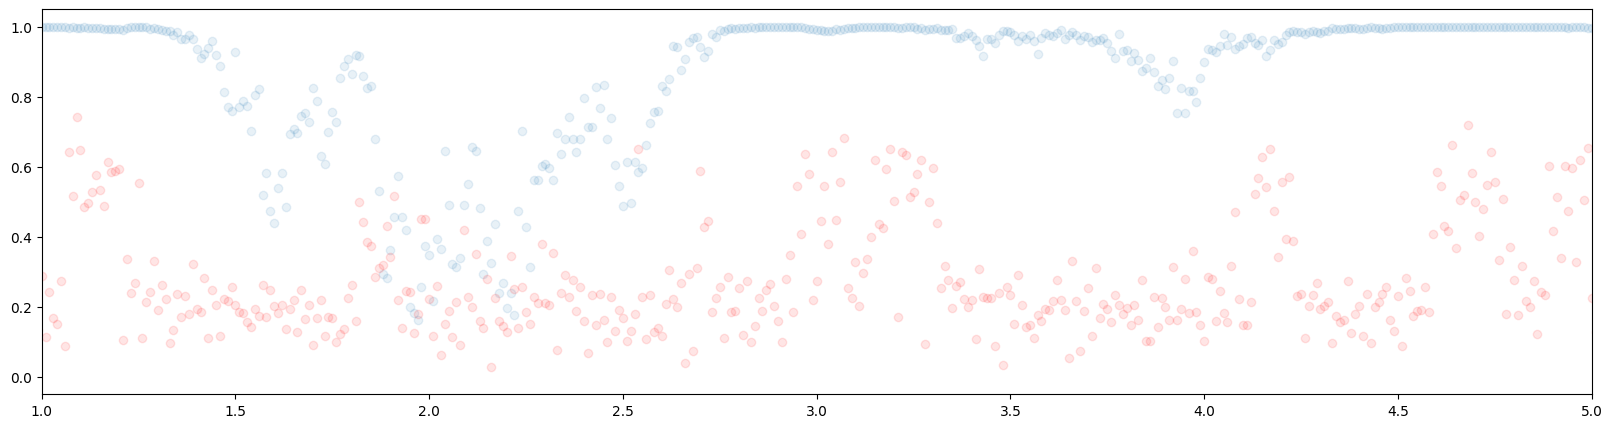

In [88]:
plt.figure(figsize=(20, 5))
plt.scatter(df.time, denoised, alpha=0.1)
plt.scatter(df.time, df.signal, alpha=0.1, c='r')
plt.xlim(1, 5)